# SciPy

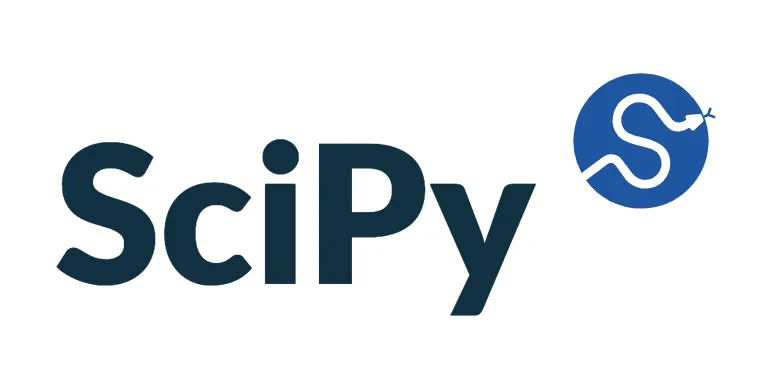

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

## Introducción

In [13]:
from scipy import *

## Funciones Especiales

Las **funciones de Bessel** aparecen frecuentemente en problemas físicos con simetría cilíndrica o esférica: propagación de ondas, vibraciones de membranas circulares, conducción de calor, etc.

* Ecuación de Bessel

La ecuación diferencial de Bessel de orden $(\nu)$ es:

$$
x^2 \frac{d^2 y}{dx^2} + x \frac{dy}{dx} + (x^2 - \nu^2) y = 0
$$

Es una ecuación lineal de segundo orden con coeficientes variables.


* Soluciones

Las soluciones generales se expresan como combinaciones de:

  - **Función de Bessel de primera especie** $(J_\nu(x))$:

$$
J_\nu(x) = \sum_{m=0}^\infty \frac{(-1)^m}{m! \, \Gamma(m + \nu + 1)} \left( \frac{x}{2} \right)^{2m + \nu}
$$

  - **Función de Bessel de segunda especie** $(Y_\nu(x))$:

$$
Y_\nu(x) = \frac{J_\nu(x) \cos(\nu \pi) - J_{-\nu}(x)}{\sin(\nu \pi)}
\quad \text{(para } \nu \notin \mathbb{Z})
$$

Para órdenes enteros $(n)$, escribimos usualmente:

$$
j_n(x) \equiv J_n(x),
\quad
y_n(x) \equiv Y_n(x)
$$


* Propiedades

  - Son funciones **oscilatorias**, parecidas a senos y cosenos pero con amplitud decreciente.
  - Tienen **ceros positivos** que se usan en muchos problemas de contorno (como modos de vibración).
  - Aplicaciones en:
    - Ecuación de Laplace y Helmholtz en coordenadas cilíndricas o esféricas.
    - Ingeniería eléctrica, acústica, óptica, mecánica cuántica, etc.



In [14]:
from scipy.special import jn, yn, jn_zeros, yn_zeros

In [15]:
n = 0    # orden
x = 0.0  # punto a evaluar

# Función de Bessel de primer tipo
print("J_%d(%f) = %f" % (n, x, jn(n, x)))

x = 1.0
# Función de Bessel de segundo tipo
print("Y_%d(%f) = %f" % (n, x, yn(n, x)))

J_0(0.000000) = 1.000000
Y_0(1.000000) = 0.088257


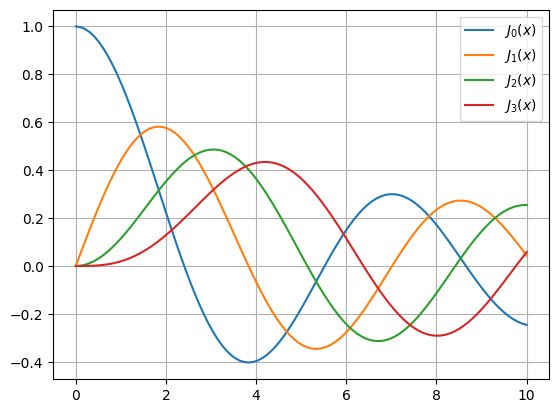

In [16]:
x = np.linspace(0, 10, 100)

# Grafiquemos las funciones de Bessel del primer tipo
fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();
ax.grid();

### Vibraciones de una Membrana Circular

Una **membrana circular** (como un tambor) de radio $(a)$, tensa y fija en el borde, puede vibrar transversalmente. Si denotamos la deformación en función del tiempo y espacio como $(u(r,\theta,t))$, y asumimos simetría radial (no depende de $(\theta)$), entonces el problema se reduce a resolver la ecuación de ondas en coordenadas polares:

$$
\frac{\partial^2 u}{\partial t^2} = c^2 \left( \frac{\partial^2 u}{\partial r^2} + \frac{1}{r} \frac{\partial u}{\partial r} \right)
$$

Aplicando separación de variables:  
$$
u(r,t) = R(r) \cdot T(t)
$$

Al sustituir y dividir por $(c^2 R\,T)$ obtenemos:
$$
\frac{T''(t)}{c^2\,T(t)}
=
\frac{R''(r)}{R(r)} + \frac{1}{r}\,\frac{R'(r)}{R(r)}
= -\lambda,
$$
donde $(\lambda>0)$ es la constante de separación.

* Ecuación temporal

$$
T''(t) + \lambda\,c^2\,T(t) = 0.
$$
Soluciones:
$$
T_n(t) = A_n\cos(\omega_n t) + B_n\sin(\omega_n t),
\quad
\omega_n = c\sqrt{\lambda}.
$$

* Ecuación radial  

Ecuación de Bessel para $R(r)$:

$$
r^2 R'' + r R' + (\lambda r^2) R = 0,
$$

cuyo dominio es $(r \in [0, a])$ y con condición de contorno $(R(a) = 0)$ (membrana fija en el borde).  


La solución finita en $(r=0)$ es
$$
R(r) = C\,J_0\bigl(\sqrt{\lambda}\,r\bigr),
$$
donde $(J_0)$ es la **función de Bessel de primera especie** de orden cero.


Condición de contorno en el borde

Borde fijo: $(u(a,t)=0)$ para todo $t$.  
Implica $(R(a)=0)$, es decir:
$$
J_0\bigl(\sqrt{\lambda}\,a\bigr) = 0.
$$
Sea $(\alpha_n)$ el $(n)$-ésimo cero positivo de $(J_0)$:
$$
\sqrt{\lambda_n}\,a = \alpha_n
\quad\Longrightarrow\quad
\lambda_n = \bigl(\alpha_n/a\bigr)^2.
$$


Esto corresponde a la ecuación de Bessel de orden cero:

$$
x^2 R'' + x R' + x^2 R = 0 \quad \Rightarrow \quad R(r) = J_0(\sqrt{\lambda} r)
$$

Para que $(R(a) = 0)$, la solución no trivial ocurre si $(\sqrt{\lambda} a = \alpha_n)$, donde $(\alpha_n)$ es el $(n)$-ésimo **cero positivo de $(J_0)$**.  
Los **modos naturales de vibración** corresponden entonces a:

$$
u_n(r,t) = J_0\left(\frac{\alpha_n r}{a} \right) \cos(\omega_n t),
\quad \omega_n = c \frac{\alpha_n}{a}
$$



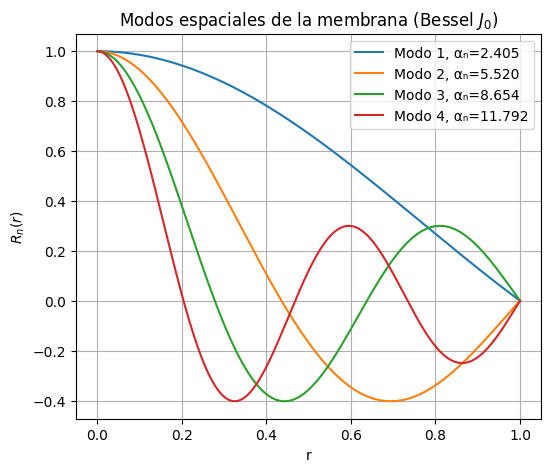

Modo 1: αₙ = 2.40483,  ωₙ = 2.40483
Modo 2: αₙ = 5.52008,  ωₙ = 5.52008
Modo 3: αₙ = 8.65373,  ωₙ = 8.65373
Modo 4: αₙ = 11.79153,  ωₙ = 11.79153


In [17]:
from scipy.special import jn_zeros, j0

# Parámetros físicos y numéricos
a = 1.0         # radio de la membrana
c = 1.0         # velocidad de onda
num_modes = 4   # cuántos modos queremos

# Primeros ceros de J0
alphas = jn_zeros(0, num_modes)   # [alpha1, alpha2, ...]

# Malla radial
r = np.linspace(0, a, 200)

# Graficar cada modo espacial R_n(r)
plt.figure(figsize=(6,5))
for n, alpha in enumerate(alphas, start=1):
    omega_bn = r * alpha / a
    Rn = j0(omega_bn)  # Perfil espacial del modo n
    plt.plot(r, Rn, label=f'Modo {n}, αₙ={alpha:.3f}')
plt.xlabel('r')
plt.ylabel(r'$R_n(r)$')
plt.title('Modos espaciales de la membrana (Bessel $J_0$)')
plt.legend()
plt.grid(True)
plt.show()

# Frecuencias propias
for n, alpha in enumerate(alphas, start=1):
    omega_n = c * alpha / a
    print(f"Modo {n}: αₙ = {alpha:.5f},  ωₙ = {omega_n:.5f}")

## Integración

#### Cuadratura


Evaluación numérica de una función del tipo

$$\displaystyle \int_a^b f(x) dx$$

es llamado *cuadratura numérica*, o simplemente *cuadratura*. SciPy proporciona una serie de funciones para diferentes tipos de cuadratura, por ejemplo, la
 `quad`, `dblquad` y `tplquad` para integrales simples, dobles y triples, respectivamente.




In [18]:
from scipy.integrate import quad, dblquad

La función `quad` toma una gran cantidad de argumentos opcionales, que se pueden usar para ajustar el comportamiento de la función
(QUADPACK (escrita en Fortran), y su algoritmo más utilizado es el método adaptativo de cuadratura basado en reglas de Gauss–Kronrod).

* **Regla de Gauss de orden $(n)$:**

$$
I \;=\;\int_a^b f(x)\,dx
\;\approx\;
I_n \;=\;\sum_{i=1}^n w_i^{(G)}\,f\bigl(x_i^{(G)}\bigr),
$$

donde $(x_i^{(G)})$ y $(w_i^{(G)})$ son los nodos y pesos de Gauss–Legendre.

El uso básico es el siguiente:


In [19]:
# Definamos una función muy simple para integrarla
def f(x):
    return x
# Sabemos que la integral indefinida es  x^2/2 + C

In [20]:
x_lower = 0 # el límite inferior de x
x_upper = 1 # el límite superior de x

val, abserr = quad(f, x_lower, x_upper)

print("Valor de la integral es =", val, ", error =", abserr)
print("Valor real es = ",(x_upper**2-x_lower**2)/2)

Valor de la integral es = 0.5 , error = 5.551115123125783e-15
Valor real es =  0.5


También podemos utilizar 'Inf' o '-Inf' como límites integrales.  Por ejemplo la integral
$$∫_{-∞}^{∞}e^{-x^2}dx = \sqrt{\pi}$$

In [21]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -np.inf, np.inf)

print("Valor numerico  =", val, abserr)

analytical = np.sqrt(np.pi)
print("Valor Real =", analytical)

Valor numerico  = 1.7724538509055159 1.4202636780944923e-08
Valor Real = 1.7724538509055159


Dado que el integrando es casi cero, excepto cerca del origen, esperaríamos que límites de integración grandes pero finitos arrojaran el mismo resultado. Sin embargo:


In [22]:
val, abserr = quad(lambda x: np.exp(-x ** 2), -10000, 10000)
print("Valor numerico  =", val, abserr)

Valor numerico  = 1.975190562208035e-203 0.0


La integración de dimensiones superiores funciona de la misma manera:

$$\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-x^2-y^2}dy dx$$

In [23]:
def integrand(x, y):
    return np.exp(-x**2-y**2)

x_lower = 0
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)
# Nótese cómo tuvimos que pasar funciones lambda para los límites para la integración y, ya que éstas en general pueden ser funciones de x.

print(val, abserr)

0.7853981633974476 1.3753098510194181e-08


Ahora es tiempo de que veamos algunas aplicaciones del cálculo de integrales.

#### Integral elíptica completa de primer tipo

Definimos la integral
$$
K(m) \;=\; \int_{0}^{\pi/2} \bigl(1 - m \sin^2\theta \bigr)^{-1/2}\,d\theta,
$$
para $(0 \le m \le 1)$.  
Una aproximación polinómica (Abramowitz & Stegun, 1972) válida con error $(\le 3\times10^{-5})$ es:

$$
K(m)\approx a_0 + a_1 m_1 + a_2 m_1^2
  - \bigl[b_0 + b_1 m_1 + b_2 m_1^2\bigr]\,\ln m_1
  + \varepsilon(m),
$$

donde

$$
m_1 = 1 - m,\quad
\begin{aligned}
a_0 &= 1.3862944,\quad & a_1 &= 0.1119723,\quad & a_2 &= 0.0725296,\\
b_0 &= 0.5,       & b_1 &= 0.1213478, & b_2 &= 0.0288729,
\end{aligned}
$$
y $(|\varepsilon(m)| \le 3\times10^{-5})$.

Ejercicio : Evaluar numéricamente la integral de $(K(m))$ y ajustar la tolerancia hasta que
$$
\bigl|K_{\rm num}(m) - K_{\rm polinom}(m)\bigr| \le 3\times10^{-5}.
$$

Tip: Puedes usar la funcion [ellipk](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.ellipk.html) para calcular la integral eliptica.

In [25]:
from scipy.special import ellipk
from scipy import integrate

# Aproximación polinómica
def K_aprox(m):
    m1 = 1 - m
    a0, a1, a2 = 1.3862944, 0.1119723, 0.0725296
    b0, b1, b2 = 0.5, 0.1213478, 0.0288729
    poly = a0 + a1*m1 + a2*m1**2
    log_term = (b0 + b1*m1 + b2*m1**2) * np.log(m1)
    return poly - log_term

# Usando quad
def K_num(m):
    integrand = lambda th: 1.0/np.sqrt(1 - m*np.sin(th)**2)
    val, _ = integrate.quad(integrand, 0, np.pi/2, epsabs=1e-8)
    return val

# Evaluar para varios valores de m
ms = [0.2, 0.5, 0.9]
results = []
for m in ms:
    val_scipy = ellipk(m)
    val_num = K_num(m)
    val_aprx = K_aprox(m)
    err = abs(val_aprx - val_num)
    print(f"m={m:.1f}: K_num={val_num:.8f}, K_scipy={val_scipy:.8f}, K_aprox={val_aprx:.8f}, err={err:.2e}")
    results.append((m, val_num, val_scipy, val_aprx, abs(val_aprx - val_num)))

m=0.2: K_num=1.65962360, K_scipy=1.65962360, K_aprox=1.65964874, err=2.51e-05
m=0.5: K_num=1.85407468, K_scipy=1.85407468, K_aprox=1.85404578, err=2.89e-05
m=0.9: K_num=2.57809211, K_scipy=2.57809211, K_aprox=2.57811566, err=2.35e-05


#### Periodo de un péndulo de gran amplitud
Consideramos un péndulo simple constituido por una masa puntual $m$ unida a un hilo inextensible y sin masa de longitud $L$, oscilando en el plano vertical bajo la aceleración de la gravedad $g$. La coordenada generalizada es el ángulo $\theta(t)$ medido desde la vertical.


*  Ecuación de movimiento

A través de la segunda ley de Newton o bien del formalismo lagrangiano, obtenemos

$$
mL^2\ddot\theta + mgL\sin\theta = 0
\quad\Longleftrightarrow\quad
\ddot\theta + \frac{g}{L}\,\sin\theta = 0.
$$


* Conservación de la energía

La energía total $(E)$ combina energía cinética y potencial:

$$
E = T + V
  = \frac12 m (L\dot\theta)^2
    + mgL \bigl(1 - \cos\theta\bigr).
$$
Para una oscilación de amplitud máxima $\theta_m$, en los extremos $\dot\theta=0$ y
$$
E = mgL \bigl(1 - \cos\theta_m\bigr).
$$
Igualando en un instante cualquiera:
$$
\frac12 mL^2\dot\theta^2
+ mgL \bigl(1 - \cos\theta\bigr)
= mgL \bigl(1 - \cos\theta_m\bigr).
$$



* Integral para el periodo

Despejando $\dot\theta$:
$$
\dot\theta
= \frac{d\theta}{dt}
= \pm \sqrt{\frac{2g}{L}\,\bigl(\cos\theta - \cos\theta_m\bigr)}.
$$
Usando la identidad trigonométrica
$\cos\theta - \cos\theta_m = 2\sin\bigl(\tfrac{\theta_m+\theta}{2}\bigr)\sin\bigl(\tfrac{\theta_m-\theta}{2}\bigr)$
y transformando convenientemente, el periodo completo $T$ resulta

$$
T
= 4\int_{0}^{\theta_m}
    \frac{d\theta}{\dot\theta}
= 4\sqrt{\frac{L}{2g}}
    \int_{0}^{\theta_m}
    \frac{d\theta}
         {\sqrt{\sin^2(\theta_m/2) - \sin^2(\theta/2)}}.
$$
Reescribiendo $(T_0 = 2\pi\sqrt{L/g})$, se muestra que

$$
T \;=\;
\frac{T_0}{\pi}
\int_{0}^{\theta_m}
\frac{d\theta}
     {\sqrt{\sin^2(\tfrac{\theta_m}{2}) - \sin^2(\tfrac{\theta}{2})}}.
$$


Existe además la expansión en serie de potencias
$$
T \;\approx\; T_0\,
\Bigl[\,1 + \bigl(\tfrac12\bigr)^2\sin^2\tfrac{\theta_m}{2}
          + \bigl(\tfrac{1\cdot3}{2\cdot4}\bigr)^2\sin^4\tfrac{\theta_m}{2}
          + \cdots \Bigr].
$$


<ipython-input-26-ff4efa6dabc6>:36: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "s-." (-> linestyle='-.'). The keyword argument will take precedence.
  plt.plot(theta_m_vals, Te/T0, 's-.', linestyle=':',label='Elíptica (ellipk)')


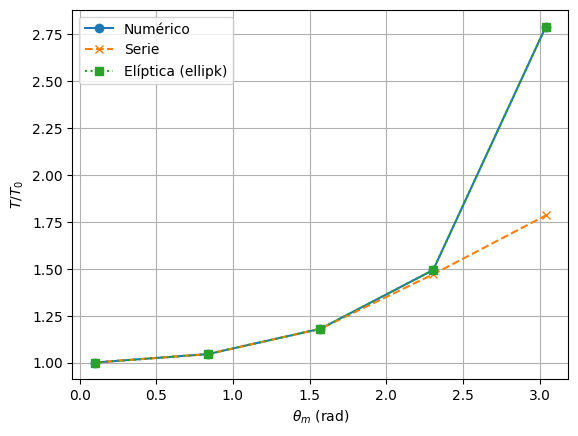

In [26]:
from scipy import integrate
from scipy.special import ellipk

# Parámetros
theta_m_vals = np.linspace(0.1, np.pi-0.1, 5)
T0 = 2*np.pi  # supondremos L/g=1 para simplicidad

def T_num(theta_m):
    integrand = lambda th: 1/np.sqrt(np.sin(theta_m/2)**2 - np.sin(th/2)**2)
    I, _ = integrate.quad(integrand, 0, theta_m)
    return (T0/np.pi)*I

def T_series(theta_m, N=5):
    x = np.sin(theta_m/2)
    s = 1
    coef = 1
    for k in range(1, N):
        coef *= (2*k-1)/(2*k)
        s += (coef**2)*x**(2*k)
    return T0 * s

# Solución con integral elíptica completa de 1er tipo
def T_ellip(theta_m):
    m = np.sin(theta_m/2)**2
    return (2*T0/np.pi) * ellipk(m)

# Cálculos
Tn = [T_num(th) for th in theta_m_vals]
Ts = [T_series(th, N=10) for th in theta_m_vals]
Te = np.array([T_ellip(th) for th in theta_m_vals])

# Gráfico
plt.figure()
plt.plot(theta_m_vals, np.array(Tn)/T0, linestyle='-', marker='o', label='Numérico')
plt.plot(theta_m_vals, np.array(Ts)/T0, linestyle='--',marker='x', label='Serie')
plt.plot(theta_m_vals, Te/T0, 's-.', linestyle=':',label='Elíptica (ellipk)')
plt.xlabel(r'$\theta_m$ (rad)')
plt.ylabel(r'$T/T_0$')
plt.grid(True)
plt.legend()
plt.show()

## Ecuaciones diferenciales ordinarias (EDO)


In [27]:
from scipy.integrate import odeint

Un sistema de EDO suele formularse en forma estándar antes de analizarlo numéricamente. La forma estándar es:

$$y' = f(y, t)$$

donde

$y = [y_1(t), y_2(t), ..., y_n(t)]$

y $f$ es alguna función que nos da las derivadas de la función $y_i(t)$. Para resolver una EDO necesitamos conocer la función $f$ y una condición inicial, $y(0)$.

Tenga en cuenta que las EDO de orden superior siempre se pueden escribir en esta forma introduciendo nuevas variables para las derivadas intermedias.

Una vez que hemos definido la función Python `f` y la matriz `y_0` (es decir, $f$ y $y(0)$ en la formulación matemática), podemos usar la función `odeint` como:


    y_t = odeint(f, y_0, t)

Donde `t` es una matriz con coordenadas temporales para resolver el problema de EDO. `y_t` es una matriz con una fila para cada punto temporal en `t`, donde cada columna corresponde a una solución `y_i(t)` en ese punto temporal.

Veremos cómo podemos implementar `f` e `y_0` en código Python en los ejemplos a continuación.

#### Resolución de ecuaciones diferenciales ordinarias


Para resolver una ecuación diferencial ordinaria del tipo
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t)$$

con  $y(t_0)=y_0$, podemos usar la función `odeint` de `scipy`.
La función
$$y(t) \quad \mathrm{para}\quad t\in[0,2]$$
esta dada por la ecuación diferencial:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{con} \quad y(0)=1.$$

Text(0, 0.5, 'y(t)')

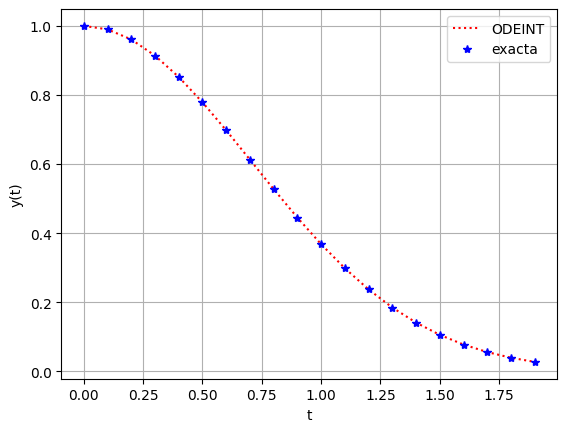

In [32]:
def f(y, t):
    """Este es el lado derecho de la EDO para integrar, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = 1             # valor inicial
a = 0              # límites de integración para t
b = 2

t = np.arange(a, b, 0.1)  # valores de t para que necesitamos la solución y(t)

y = odeint(f, y0, t)  # cálculo real de y(t)

yy = np.exp(-t**2)
plt.plot(t, y,':r' ,label = 'ODEINT')
plt.plot(t, yy, '*b', label='exacta')
plt.grid()
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')

#### Movimiento Planetario: Dos Leyes de Newton

Newton demostró que un planeta de masa \(m\) atraído por el Sol de masa \(M\) obedece la ley de gravitación universal:
$$
F^{(g)} = -\frac{G\,m\,M}{r^2},
$$
donde \(r\) es la distancia planeta–Sol. En coordenadas cartesianas \((x,y)\), la segunda ley $(m\ddot{\mathbf r}=\mathbf F)$ da dos ecuaciones de segundo orden:

$$
m\,\frac{d^2x}{dt^2} = -G\,m\,M\,\frac{x}{(x^2+y^2)^{3/2}},
\quad
m\,\frac{d^2y}{dt^2} = -G\,m\,M\,\frac{y}{(x^2+y^2)^{3/2}}.
$$

Cancelando \(m\) y asumiendo unidades en que \(G\,M=1\), quedan
$$
\frac{d^2x}{dt^2} = -\frac{x}{(x^2+y^2)^{3/2}},
\quad
\frac{d^2y}{dt^2} = -\frac{y}{(x^2+y^2)^{3/2}}.
$$


Ejercicio:

Con las siguientes condiciones iniciales
   $$
   x(0)=0.5,\quad y(0)=0,\quad \dot x(0)=0,\quad \dot y(0)=1.63.
   $$

Modifica tu solver de ODE para integrar las ecuaciones anteriores.

Usaremos la funcion [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)

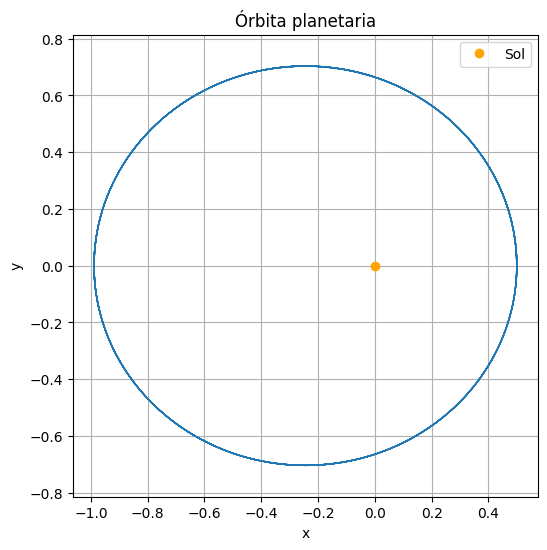

In [33]:
from scipy.integrate import solve_ivp

# 1. Definición del sistema de EDOs
def rhs(t, u):
    x, y, vx, vy = u
    r3 = (x**2 + y**2)**(3/2)
    ax = -x / r3
    ay = -y / r3
    return [vx, vy, ax, ay]

# 2. Parámetros y condiciones iniciales
GM = 1.0          # Unidad: G*M = 1
u0 = [0.5, 0.0,   # x(0), y(0)
      0.0, 1.63]  # vx(0), vy(0)

t_span = (0.0, 20.0)  # intervalo de tiempo
dt = 0.01             # paso de salida para la solución

# 3. Integración con solve_ivp
sol = solve_ivp(fun=lambda t,u: rhs(t,u),# funcion
                t_span=t_span, y0=u0,
                method='RK45',               # Runge–Kutta de alto orden
                rtol=1e-9, atol=1e-12,
                t_eval=np.arange(t_span[0], t_span[1], dt))

# 4. Gráfica de la órbita x vs y
plt.figure(figsize=(6,6))
plt.plot(sol.y[0], sol.y[1], '-', lw=1)
plt.plot(0, 0, 'o', color='orange', label='Sol')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbita planetaria')
plt.legend()
plt.grid(True)
plt.show()

Con las mismas condiciones que produjeron la elipse, cambia la fuerza a
   $$
   F^{(g)} \propto -\frac{1}{r^{3+\alpha}},\quad \alpha\neq0,
   $$
   y observa la precesión de la órbita. $(\alpha = 0.0,\,0.01,\,0.1,\,0.5)$.

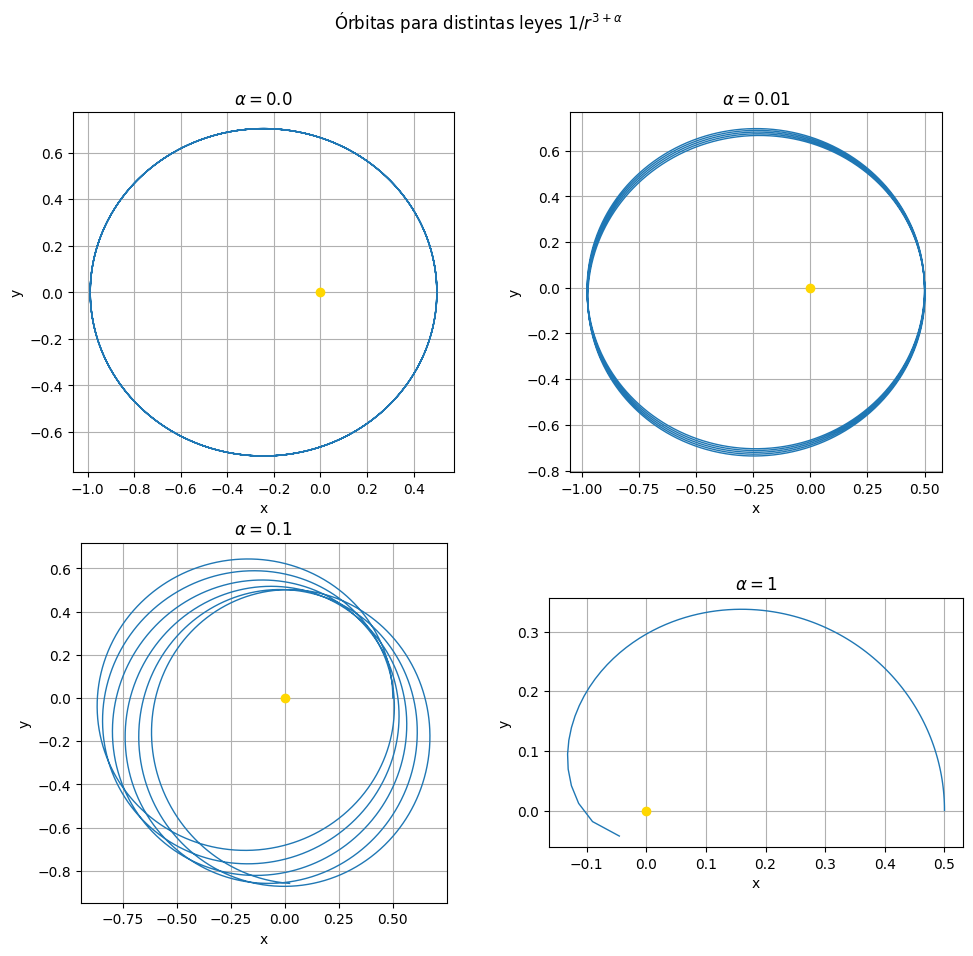

In [36]:
# Función RHS para diferentes alpha
def rhs(t, u, alpha):
    x, y, vx, vy = u
    r2 = x**2 + y**2
    r_pow = r2**((3+alpha)/2)
    ax = -x / r_pow
    ay = -y / r_pow
    return [vx, vy, ax, ay]

# Condiciones iniciales y parámetros
GM = 1.0
u0 = [0.5, 0.0, 0.0, 1.63]  # x0, y0, vx0, vy0
t_span = (0.0, 20.0)
t_eval = np.linspace(t_span[0], t_span[1], 5000)

# Lista de alfas a comparar
alphas = [0.0, 0.01, 0.1, 1]

# Preparar figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for ax, alpha in zip(axes, alphas):
    sol = solve_ivp(
        fun=lambda t, u: rhs(t, u, alpha),
        t_span=t_span, y0=u0,
        method='DOP853',
        rtol=1e-9, atol=1e-12,
        t_eval=t_eval
    )
    ax.plot(sol.y[0], sol.y[1], lw=1)
    ax.plot(0, 0, 'o', color='gold', label='Sol')
    ax.set_aspect('equal', 'box')
    ax.set_title(r'$\alpha = {}$'.format(alpha))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

fig.suptitle('Órbitas para distintas leyes $1/r^{3+\\alpha}$')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### Oscilador armónico amortiguado


La ecuación de movimiento para el oscilador amortiguado es:

$$\displaystyle \frac{\mathrm{d}^2x}{\mathrm{d}t^2} + 2\zeta\omega_0\frac{\mathrm{d}x}{\mathrm{d}t} + \omega^2_0 x = 0$$

donde $x$ es la posición del oscilador, $\omega_0$ es la frecuencia, y
$\zeta$ es la relación de amortiguamiento. Para escribir esta EDO de segundo orden en forma estándar introducimos $p = \frac{\mathrm{d}x}{\mathrm{d}t}$:

$$\displaystyle \frac{\mathrm{d}p}{\mathrm{d}t} = - 2\zeta\omega_0 p - \omega^2_0 x$$

$$\displaystyle \frac{\mathrm{d}x}{\mathrm{d}t} = p$$

En la implementación de este ejemplo, añadiremos argumentos adicionales a la función RHS para la EDO, en lugar de usar variables globales como en el ejemplo anterior. Como consecuencia de los argumentos adicionales al RHS, necesitamos pasar un argumento de palabra clave, `args`, a la función `odeint`:


In [38]:
def dy(y, t, zeta, w0):
    """
    El lado derecho de la EDO del oscilador amortiguado
    """
    x, p = y[0], y[1]

    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

In [39]:
# estado inicial:
y0 = [1.0, 0.0]

# intervalo de tiempo para resolver la EDO
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

# Resolver el problema de EDO para tres valores diferentes del coeficiente de amortiguamiento
y1 = odeint(dy, y0, t, args=(0.0, w0)) # sin amortiguar
y2 = odeint(dy, y0, t, args=(0.2, w0)) # bajo amortiguamiento
y3 = odeint(dy, y0, t, args=(1.0, w0)) # amortiguamiento crítico
y4 = odeint(dy, y0, t, args=(5.0, w0)) # sobreamortiguado

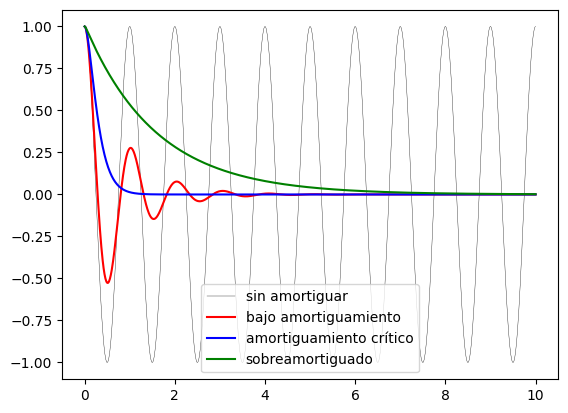

In [40]:
fig, ax = plt.subplots()
ax.plot(t, y1[:,0], 'k', label="sin amortiguar", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="bajo amortiguamiento")
ax.plot(t, y3[:,0], 'b', label=r"amortiguamiento crítico")
ax.plot(t, y4[:,0], 'g', label="sobreamortiguado")
ax.legend();

#### Péndulo Doble

In [ ]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

Las ecuaciones de movimiento del péndulo son:

${\dot \theta_1} = \frac{6}{m\ell^2} \frac{ 2 p_{\theta_1} - 3 \cos(\theta_1-\theta_2) p_{\theta_2}}{16 - 9 \cos^2(\theta_1-\theta_2)}$

${\dot \theta_2} = \frac{6}{m\ell^2} \frac{ 8 p_{\theta_2} - 3 \cos(\theta_1-\theta_2) p_{\theta_1}}{16 - 9 \cos^2(\theta_1-\theta_2)}.$

${\dot p_{\theta_1}} = -\frac{1}{2} m \ell^2 \left [ {\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) + 3 \frac{g}{\ell} \sin \theta_1 \right ]$

${\dot p_{\theta_2}} = -\frac{1}{2} m \ell^2 \left [ -{\dot \theta_1} {\dot \theta_2} \sin (\theta_1-\theta_2) +  \frac{g}{\ell} \sin \theta_2 \right]$

Para que el código Python sea más fácil de seguir, introduzcamos nuevos nombres de variables y la notación vectorial: $x = [\theta_1, \theta_2, p_{\theta_1}, p_{\theta_2}]$

${\dot x_1} = \frac{6}{m\ell^2} \frac{ 2 x_3 - 3 \cos(x_1-x_2) x_4}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_2} = \frac{6}{m\ell^2} \frac{ 8 x_4 - 3 \cos(x_1-x_2) x_3}{16 - 9 \cos^2(x_1-x_2)}$

${\dot x_3} = -\frac{1}{2} m \ell^2 \left [ {\dot x_1} {\dot x_2} \sin (x_1-x_2) + 3 \frac{g}{\ell} \sin x_1 \right ]$

${\dot x_4} = -\frac{1}{2} m \ell^2 \left [ -{\dot x_1} {\dot x_2} \sin (x_1-x_2) +  \frac{g}{\ell} \sin x_2 \right]$

In [41]:
g = 9.82
L = 0.5
m = 0.1

def dx(x, t):
    """
    El lado derecho de la EDO del péndulo
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = 6.0/(m*L**2) * (2 * x3 - 3 * np.cos(x1-x2) * x4)/(16 - 9 * np.cos(x1-x2)**2)
    dx2 = 6.0/(m*L**2) * (8 * x4 - 3 * np.cos(x1-x2) * x3)/(16 - 9 * np.cos(x1-x2)**2)
    dx3 = -0.5 * m * L**2 * ( dx1 * dx2 * np.sin(x1-x2) + 3 * (g/L) * np.sin(x1))
    dx4 = -0.5 * m * L**2 * (-dx1 * dx2 * np.sin(x1-x2) + (g/L) * np.sin(x2))

    return [dx1, dx2, dx3, dx4]

In [42]:
# elige un estado inicial
x0 = [np.pi/4, np.pi/2, 0, 0]

# coordenada de tiempo para resolver la EDO: de 0 a 10 segundos
t = np.linspace(0, 10, 250)

# resolver el problema de EDO
x = odeint(dx, x0, t)

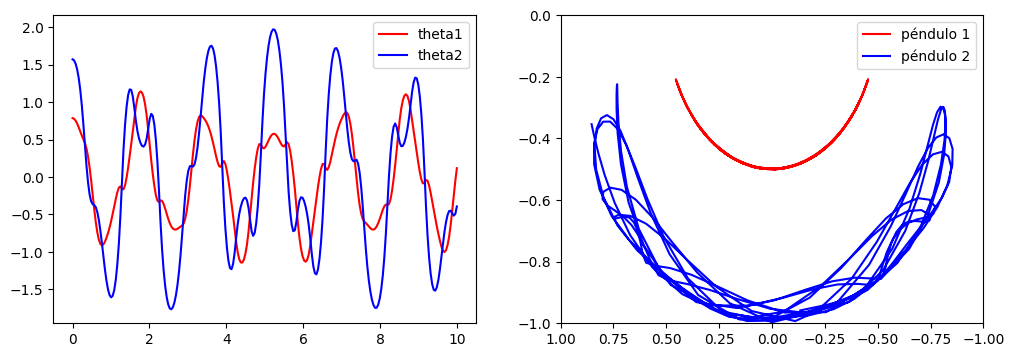

In [43]:
# Graficar los ángulos en función del tiempo

fig, axes = plt.subplots(1,2, figsize=(12,4))

# Grafiquemos los angulos theta vs tiempo
axes[0].plot(t, x[:, 0], 'r', label="theta1")
axes[0].plot(t, x[:, 1], 'b', label="theta2")
axes[0].legend()

# Grafiquemos la trayectoria de los dos pendulos
x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])

x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])

axes[1].plot(x1, y1, 'r', label="péndulo 1")
axes[1].plot(x2, y2, 'b', label="péndulo 2")
axes[1].legend()
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1]);

#### Dos Depredadores, Una Presa

Consideramos una extensión del modelo Lotka–Volterra en el cual dos poblaciones de depredadores $(P_1$) y $(P_2)$ comparten una misma presa $(p)$. La presa crece logísticamente en ausencia de depredadores. El sistema de ecuaciones es

$$
\frac{dp}{dt}
= a\,p\Bigl(1 - \frac{p}{K}\Bigr)\;-\;(b_1 P_1 + b_2 P_2)\,p,
$$

$$
\frac{dP_1}{dt}
= \epsilon_1\,b_1\,p\,P_1 \;-\; m_1\,P_1,
$$

$$
\frac{dP_2}{dt}
= \epsilon_2\,b_2\,p\,P_2 \;-\; m_2\,P_2.
$$

Donde los parámetros valen:

- $(a = 0.2)$ (tasa de crecimiento de la presa)  
- $(K = 1.7)$ (capacidad de carga)  
- $(b_1 = 0.1,\; b_2 = 0.2)$ (tasas de captura)  
- $(m_1 = m_2 = 0.1)$ (tasas de mortalidad de depredadores)  
- $(\epsilon_1 = 1.0,\;\epsilon_2 = 2.0)$ (eficiencias de conversión)  

Condiciones iniciales:
$$
p(0) = 1.7,\quad P_1(0) = 1.0,\quad P_2(0) = 1.7.
$$

\\
Ejercicio:
- Evolución temporal de las poblaciones

Integra el sistema con `solve_ivp` y grafica $(p(t))$, $(P_1(t))$ y $(P_2(t))$.

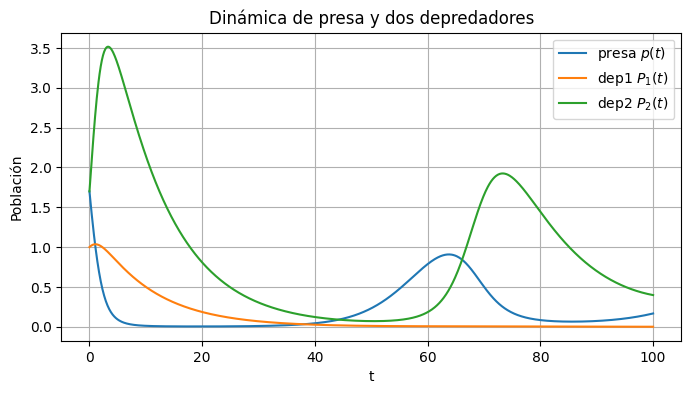

In [44]:
from scipy.integrate import solve_ivp

# Parámetros
a, K = 0.2, 1.7
b1, b2 = 0.1, 0.2
m1, m2 = 0.1, 0.1
eps1, eps2 = 1.0, 2.0

# RHS del sistema
def rhs(t, u):
    p, P1, P2 = u
    dp = a*p*(1 - p/K) - (b1*P1 + b2*P2)*p
    dP1 = eps1*b1*p*P1 - m1*P1
    dP2 = eps2*b2*p*P2 - m2*P2
    return [dp, dP1, dP2]

# Condiciones iniciales y tiempo
u0 = [1.7, 1.0, 1.7]
t_span = (0.0, 100.0)
t_eval = np.linspace(*t_span, 1000)

# Integración
sol = solve_ivp(rhs, t_span, u0, t_eval=t_eval, rtol=1e-8, atol=1e-10)

# Gráfico
plt.figure(figsize=(8,4))
plt.plot(sol.t, sol.y[0], label='presa $p(t)$')
plt.plot(sol.t, sol.y[1], label='dep1 $P_1(t)$')
plt.plot(sol.t, sol.y[2], label='dep2 $P_2(t)$')
plt.xlabel('t')
plt.ylabel('Población')
plt.legend()
plt.title('Dinámica de presa y dos depredadores')
plt.grid(True)
plt.show()

# Gracias por si participación